# Heart Health Prognosticator: Predicting Cardiac Disease Risk

### Мета: Виявлення закономірностей та взаємозв'язків у даних для прогнозування та розвитку хвороб серця, шляхом аналізу показників, таких як вік, стать та симптоми. Ціль полягає в ідентифікації тенденцій, кореляційних залежностей та ризикових факторів, які допоможуть у вчасному виявленні та лікуванні серцевих захворювань.

#### використані ресурси http://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
!pip install tensorflow
!pip install pandas==1.5.3

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

### Імпорт данних

In [4]:
data = pd.read_csv('C:/Users/USER/Downloads/processed.cleveland.csv', names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], delimiter=',')

In [5]:
print( 'Shape of DataFrame: {}'.format(data.shape))
print (data.loc[1])

Shape of DataFrame: (303, 14)
age          67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeak       1.5
slope         2.0
ca            3.0
thal          3.0
target        2.0
Name: 1, dtype: float64


In [6]:
print(data.isnull().any())


age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


In [7]:
print(data.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [8]:
# Розрахунок середніх значень для кожного атрибуту
mean_values = data.mean()

# Виведення середніх значень
print("Середні значення:")
print(mean_values)

Середні значення:
age          54.438944
sex           0.679868
cp            3.158416
trestbps    131.689769
chol        246.693069
fbs           0.148515
restecg       0.990099
thalach     149.607261
exang         0.326733
oldpeak       1.039604
slope         1.600660
ca            0.663366
thal          4.702970
target        0.937294
dtype: float64


In [9]:
# Видалення рядків з пропущеними значеннями
data = data.dropna(axis=0)

In [10]:
# Розділення даних на вхідні та вихідні значення
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [11]:
# Розділення на тренувальний та тестовий набори даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Масштабування даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Перетворення даних у відповідний формат для LSTM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [14]:
# Визначення архітектури моделі з Dropout шарами
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256, kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(tf.keras.layers.LSTM(128, kernel_regularizer=regularizers.l2(0.01), return_sequences=True))
model.add(tf.keras.layers.LSTM(64, kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [15]:
# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Використання ранньої зупинки навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [17]:
# Тренування моделі
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
8/8 [==============================] - 7s 209ms/step - loss: 5.8287 - accuracy: 0.3678 - val_loss: 4.7564 - val_accuracy: 0.3443
Epoch 2/50
8/8 [==============================] - 0s 51ms/step - loss: 3.9612 - accuracy: 0.4132 - val_loss: 2.8637 - val_accuracy: 0.3443
Epoch 3/50
8/8 [==============================] - 0s 55ms/step - loss: 2.5273 - accuracy: 0.4628 - val_loss: 1.2472 - val_accuracy: 0.3770
Epoch 4/50
8/8 [==============================] - 0s 57ms/step - loss: 0.8916 - accuracy: 0.4752 - val_loss: 1.0303 - val_accuracy: 0.3770
Epoch 5/50
8/8 [==============================] - 0s 53ms/step - loss: -0.6957 - accuracy: 0.4917 - val_loss: 0.4027 - val_accuracy: 0.3934
Epoch 6/50
8/8 [==============================] - 0s 57ms/step - loss: -2.0790 - accuracy: 0.5083 - val_loss: -0.3237 - val_accuracy: 0.4098
Epoch 7/50
8/8 [==============================] - 0s 53ms/step - loss: -3.3778 - accuracy: 0.5289 - val_loss: -1.0225 - val_accuracy: 0.4262
Epoch 8/50
8/8 [=====

In [18]:
# Оцінка моделі
loss, accuracy = model.evaluate(X_test, y_test)
print("Точність (Accuracy): {:.2f}%".format(accuracy * 100))

2/2 [==============================] - 0s 23ms/step - loss: -296.1410 - accuracy: 0.5246
Точність (Accuracy): 52.46%


In [19]:
import matplotlib.pyplot as plt

In [20]:
# Прогнозування класів для тестового набору даних
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

2/2 [==============================] - 1s 21ms/step


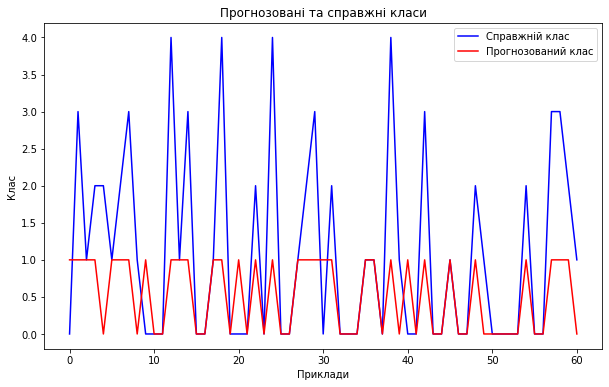

In [21]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.plot(y_test, 'b', label='Справжній клас')
plt.plot(y_pred_classes, 'r', label='Прогнозований клас')
plt.title('Прогнозовані та справжні класи')
plt.xlabel('Приклади')
plt.ylabel('Клас')
plt.legend()
plt.show()


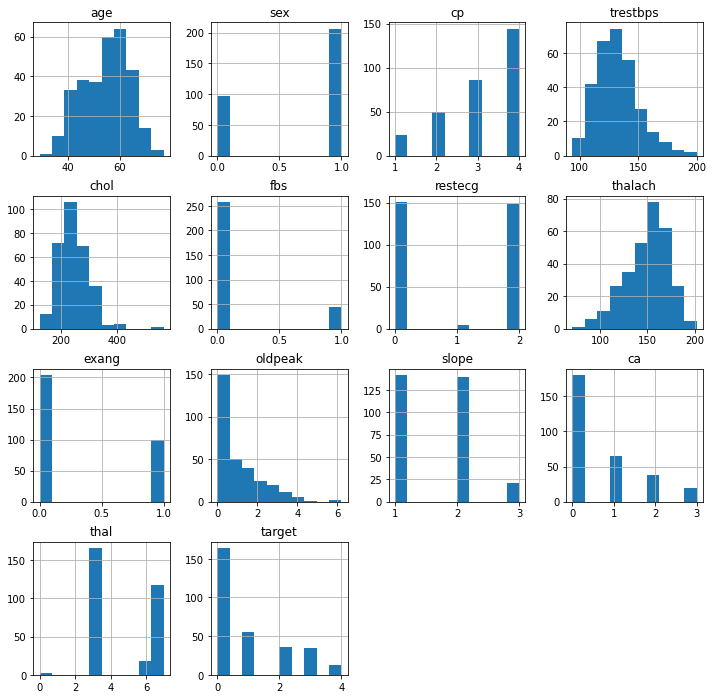

In [22]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

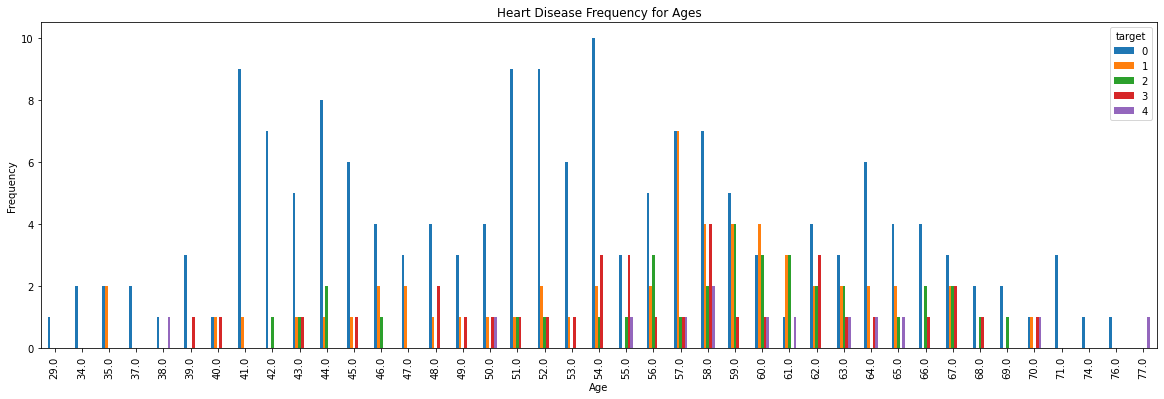

In [23]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

## Тестові дані 

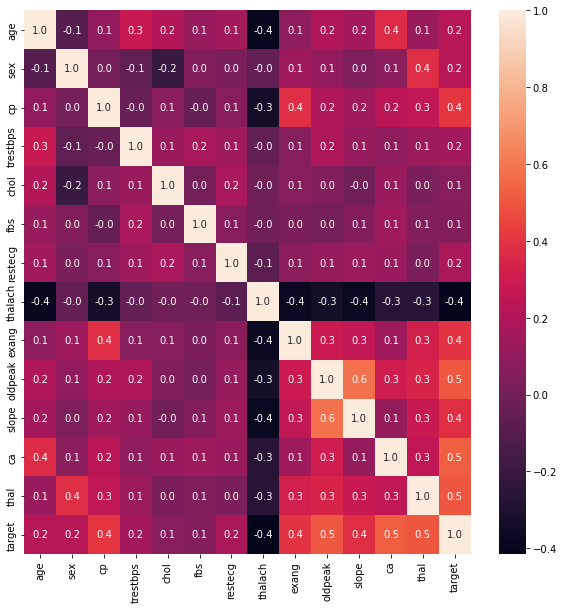

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

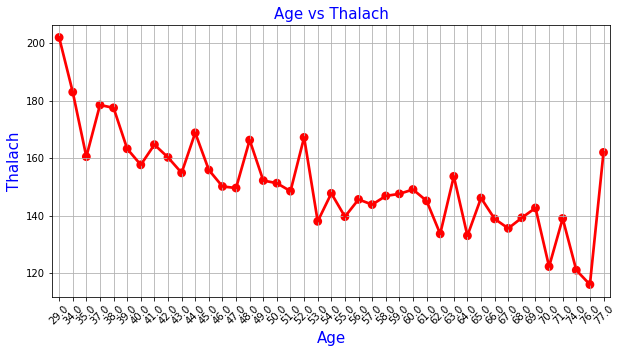

In [26]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [27]:
# Оцінка точності моделі
accuracy = np.mean(y_test == y_pred_classes)
print('Точність моделі: {:.2%}'.format(accuracy))

Точність моделі: 32.92%


#### Prognosis of heart disease using logistic regression

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('C:/Users/USER/Downloads/processed.cleveland.csv', names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], delimiter=',')

In [ ]:
# Видалення рядків з пропущеними значеннями
data = data.dropna(axis=0)

In [ ]:
# Розділення атрибутів та цільової змінної
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Побудова моделі логістичної регресії на масштабованих даних
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

In [ ]:
# Прогнозування на тестових даних
y_pred = model.predict(X_test)

In [ ]:
# Оцінка точності моделі
accuracy = accuracy_score(y_test, y_pred)
print("Точність моделі: {:.2f}%".format(accuracy * 100))